In [1]:
# This is the creditcard dataset from Kaggle. Because of confidentiality, the variables has been 
# transformed by PCA. The only non-PCA columns are amount and class

# Data Wrangling

In [2]:
#Imports the neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC

#read the csv file and examine the first rows for the first glance
creditcard_df = pd.read_csv('creditcard.csv',header = 0)
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# As a condition befor PCA, the dataset must have been process to handle missing data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#valuables V1-V28 has almost zero means and medians
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759072e-12,-8.251146e-13,-9.655448e-13,8.321385e-13,1.649983e-13,4.248434e-13,-3.054696e-13,8.777981e-14,-1.179757e-12,...,-3.405785e-13,-5.723165e-13,-9.725860e-13,1.464148e-12,-6.987110e-13,-5.617884e-13,3.332082e-12,-3.518875e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Because the data has been pre-processed with PCA, it is impossible to understand the variables
# hence we don't have a reasonale way to determine outliners. However, we would still perform some
# EDA to have some understanding on the dataset

In [6]:
#The dataset is quite imbalance, majorrity of the records are not fraud, only 0.17% of the dataset
#contains fraud records
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# EDA

In [7]:
#Due to computational limitation, EDA on this dataset is avoided

# Modeling

Modeling without resampling. This also serves as a quick evaluation to choose a candidate algorithm for further steps such as parameter tuning and resampling

In [8]:
#Creating varibales (X) and target (y) sets
from sklearn.model_selection import train_test_split
X = creditcard_df.drop('Class',axis=1)
y = creditcard_df['Class']

In [9]:
#Creating train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify= y,test_size=0.2,random_state=42)

print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(227845, 30)
Shape of X_test :(56962, 30)
Shape of y_train :(227845,)
Shape of y_test :(56962,)


 Downsampling majority

In [10]:
#we will combine X_test and y_test to get ready for oversampling
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [11]:
#Seperate minority and majority class:
not_fraud = X[X['Class'] == 0]
fraud = X[X['Class'] == 1]
print(f'Total sample which are not fraud : {len(not_fraud)}')
print(f'Total Fraud samples : {len(fraud)}')

Total sample which are not fraud : 227451
Total Fraud samples : 394


In [12]:
# downsample majority
from sklearn.utils import resample
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [13]:
#Now we will split the training upsample into X_train and y_train
Xd_train = downsampled.drop('Class',axis=1)
yd_train = downsampled['Class']

In [14]:
yd_train.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [15]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [68]:
genuine_trans = creditcard_df[creditcard_df['Class'] == 0]
fraud_trans = creditcard_df[creditcard_df['Class'] == 1]
genuine_trans_down = downsampled[downsampled['Class'] == 0]
fraud_trans_down = downsampled[downsampled['Class'] == 1]

Text(0, 0.5, 'PDF')

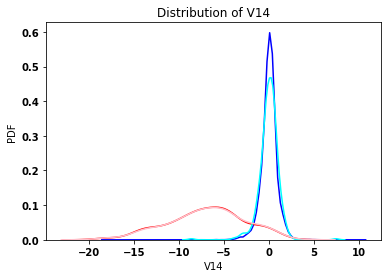

In [88]:
feature = 'V14'
# seaborn histogram
sns.distplot(genuine_trans[feature], hist=False, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(fraud_trans[feature], hist=False, kde=True, 
             bins=100, color = 'red',
             hist_kws={'edgecolor':'black'})

sns.distplot(genuine_trans_down[feature], hist=False, kde=True, 
             bins=100, color = 'cyan',
             hist_kws={'edgecolor':'black'})

sns.distplot(fraud_trans_down[feature], hist=False, kde=True, 
             bins=100, color = 'pink',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Distribution of '+feature)
plt.xlabel(feature)
plt.ylabel('PDF')

Modeling

In [16]:
#We will use logistic regression and random forest again
#We will add the suffix _up to denote our analysis for oversampling

lr_down = LogisticRegression()
rf_down = RandomForestClassifier()
knn_down = KNeighborsClassifier(n_neighbors=3)
gb_down = GradientBoostingClassifier(random_state =0)
svc_down= SVC()

In [17]:
#fitting the logistic regression model
#lr_up.fit(X_train,y_train)

In [18]:
#fitting the random forest model
#rf_up.fit(X_train,y_train)

In [19]:
#fitting the knn model
#knn_up.fit(X_train,y_train)

Cross Validation

In [20]:
#For detecting fraud, we want to:
#maximize recall score (When there are frauds, how often is the prediction correct)
#and minimize false nagative (frauds that are not detected)

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import f1_score,classification_report,recall_score, accuracy_score

In [22]:
#Currently only those scorer functions that return a single score can be passed inside the dict. 
#Scorer functions that return multiple values are not permitted and will require a wrapper to 
#return a single metric:

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def rc(y_true, y_pred): return recall_score(y_true, y_pred)
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'rc': make_scorer(rc)}



In [23]:
#cross validating logictics regression

lrdown_cv_results = cross_validate(lr_down.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, 
                                 scoring=scoring)

# Getting the test set false negative scores
print('Logictic regression FN scores:',lrdown_cv_results['test_fn'])

# Getting the test set f1 scores
print('Logictic regression recall scores:',lrdown_cv_results['test_rc'])

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Logictic regression FN scores: [11  7 12  9  6]
Logictic regression recall scores: [0.86075949 0.91139241 0.84810127 0.88461538 0.92405063]


In [24]:
#cross validating random forest

rfdown_cv_results = cross_validate(rf_down.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, 
                                 scoring=scoring)

# Getting the test set false negative scores
print('Random forest FN scores:',rfdown_cv_results['test_fn'])

# Getting the test set f1 scores
print('Random forest recall scores:',rfdown_cv_results['test_rc'])

Random forest FN scores: [12  3 11  7  7]
Random forest recall scores: [0.84810127 0.96202532 0.86075949 0.91025641 0.91139241]


In [25]:
#cross validating knn

knndown_cv_results = cross_validate(knn_down.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, 
                                 scoring=scoring)

# Getting the test set false negative scores
print('KNN FN scores:',knndown_cv_results['test_fn'])

# Getting the test set f1 scores
print('KNN forest recall scores:',knndown_cv_results['test_rc'])

KNN FN scores: [28 30 25 21 35]
KNN forest recall scores: [0.64556962 0.62025316 0.6835443  0.73076923 0.55696203]


In [26]:
#cross validate gradient boosting

gbdown_cv_results = cross_validate(gb_down.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, 
                                 scoring=scoring)

# Getting the test set false negative scores
print('Gradient Boosting FN scores:',gbdown_cv_results['test_fn'])

# Getting the test set f1 scores
print('Gradient Boosting recall scores:',gbdown_cv_results['test_rc'])

Gradient Boosting FN scores: [12  5 10  9  5]
Gradient Boosting recall scores: [0.84810127 0.93670886 0.87341772 0.88461538 0.93670886]


In [27]:
#cross validate support vector machine
svcdown_cv_results = cross_validate(svc_down.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, 
                                 scoring=scoring)

# Getting the test set false negative scores
print('Support Vector Machine FN scores:',svcdown_cv_results['test_fn'])

# Getting the test set f1 scores
print('Support Vector Machine recall scores:',svcdown_cv_results['test_rc'])

Support Vector Machine FN scores: [37 45 23 33 42]
Support Vector Machine recall scores: [0.53164557 0.43037975 0.70886076 0.57692308 0.46835443]


Testing

In [28]:
#making predictions

lrdown_pred = lr_down.predict(X_test)
rfdown_pred = rf_down.predict(X_test)
knndown_pred= knn_down.predict(X_test)
gbdown_pred= gb_down.predict(X_test)
svcdown_pred= svc_down.predict(X_test)

In [29]:
print('Logistic Regression Recall Score:',recall_score(y_test,lrdown_pred))
print('Random Forest Recall Score:',recall_score(y_test,rfdown_pred))
print('KNN Recall Score:',recall_score(y_test,knndown_pred))
print('Gradient Boosting Recall Score:',recall_score(y_test,gbdown_pred))
print('Support Vector Machine Recall Score:',recall_score(y_test,svcdown_pred))

Logistic Regression Recall Score: 0.9183673469387755
Random Forest Recall Score: 0.9081632653061225
KNN Recall Score: 0.6632653061224489
Gradient Boosting Recall Score: 0.9183673469387755
Support Vector Machine Recall Score: 0.6632653061224489


In [30]:
lrdown_tn = tn(y_test,lrdown_pred)
lrdown_fn = fn(y_test,lrdown_pred)
lrdown_tp = tp(y_test,lrdown_pred)
lrdown_fp = fp(y_test,lrdown_pred)

rfdown_tn = tn(y_test,rfdown_pred)
rfdown_fn = fn(y_test,rfdown_pred)
rfdown_tp = tp(y_test,rfdown_pred)
rfdown_fp = fp(y_test,rfdown_pred)

knndown_tn = tn(y_test,knndown_pred)
knndown_fn = fn(y_test,knndown_pred)
knndown_tp = tp(y_test,knndown_pred)
knndown_fp = fp(y_test,knndown_pred)

gbdown_tn = tn(y_test,gbdown_pred)
gbdown_fn = fn(y_test,gbdown_pred)
gbdown_tp = tp(y_test,gbdown_pred)
gbdown_fp = fp(y_test,gbdown_pred)

svcdown_tn = tn(y_test,svcdown_pred)
svcdown_fn = fn(y_test,svcdown_pred)
svcdown_tp = tp(y_test,svcdown_pred)
svcdown_fp = fp(y_test,svcdown_pred)

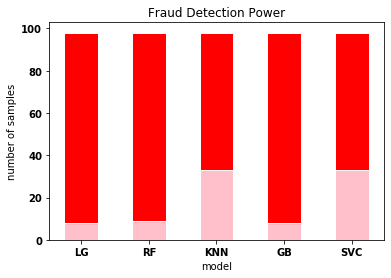

In [95]:
#plotting barplot for the fraud detection
from matplotlib import rc

# y-axis in bold
rc('font', weight='bold')

# Values of each group
#bars1 = [lrup_tn, rfup_tn, knnup_tn, gbup_tn]
bars2 = [lrdown_fn, rfdown_fn, knndown_fn, gbdown_fn, svcdown_fn]
bars3 = [lrdown_tp, rfdown_tp, knndown_tp, gbdown_tp, svcdown_tp]
#bars4 = [lrup_fn, rfup_fn, knnup_fn, gbup_fn]


# Heights of bars1 + bars2
#bars12 = np.add(bars1, bars2).tolist()
# Heights of bars1 + bars2 + bars3
#bars123 = np.add(bars12, bars3).tolist()

# The position of the bars on the x-axis
r = [0,2,4,6,8]

# Names of group and bar width
names = ['LG','RF','KNN','GB','SVC']
barWidth = 1

# Create brown bars
plt.bar(r, bars2, color='pink', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars3, bottom=bars2, color='red', edgecolor='white', width=barWidth)
# Create green bars (top)
#plt.bar(r, bars3, bottom=bars12, color='orange', edgecolor='white', width=barWidth)
#plt.bar(r, bars4, bottom=bars123, color='red', edgecolor='white', width=barWidth)

# Custom X axis
plt.title('Fraud Detection Power')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("model")
plt.ylabel('number of samples')

plt.show()

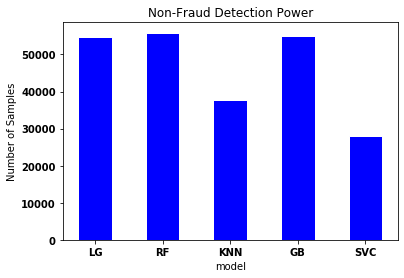

In [96]:
#plotting barplot for the confusion matrix
from matplotlib import rc

# y-axis in bold
rc('font', weight='bold')

# Values of each group
bars1 = [lrdown_tn, rfdown_tn, knndown_tn, gbdown_tn, svcdown_tn]
bars2 = [lrdown_fn, rfdown_fn, knndown_fn, gbdown_fn, svcdown_fn]
bars3 = [lrdown_tp, rfdown_tp, knndown_tp, gbdown_tp, svcdown_tp]
bars4 = [lrdown_fn, rfdown_fn, knndown_fn, gbdown_fn, svcdown_fn]


# Heights of bars1 + bars2
bars12 = np.add(bars1, bars2).tolist()
# Heights of bars1 + bars2 + bars3
bars123 = np.add(bars12, bars3).tolist()

# The position of the bars on the x-axis
r = [0,2,4,6,8]

# Names of group and bar width
names = ['LG','RF','KNN','GB','SVC']
barWidth = 1

# Create brown bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
#plt.bar(r, bars2, bottom=bars1, color='pink', edgecolor='white', width=barWidth)
# Create green bars (top)
#plt.bar(r, bars3, bottom=bars12, color='red', edgecolor='white', width=barWidth)
plt.bar(r, bars4, bottom=bars1, color='cyan', edgecolor='white', width=barWidth)

# Custom X axis
plt.title('Non-Fraud Detection Power')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("model")
plt.ylabel('Number of Samples')

plt.show()

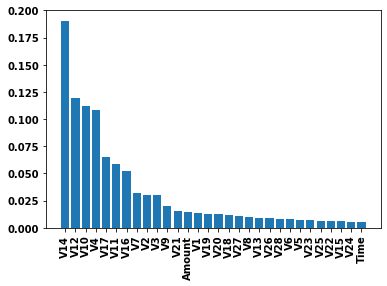

In [32]:
#Feature Importance of RF
importances_rf = rf_down.feature_importances_

# index of greatest to least feature importances
sorted_index = np.argsort(importances_rf)[::-1]
x = range(len(importances_rf))
# create tick labels
feature_names = creditcard_df.columns
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances_rf[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

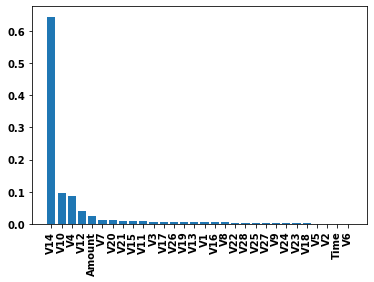

In [33]:
#Feature Importance of GB
importances_gb = gb_down.feature_importances_

# index of greatest to least feature importances
sorted_index = np.argsort(importances_gb)[::-1]
x = range(len(importances_gb))
# create tick labels
feature_names = creditcard_df.columns
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances_gb[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [34]:
lr_down.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

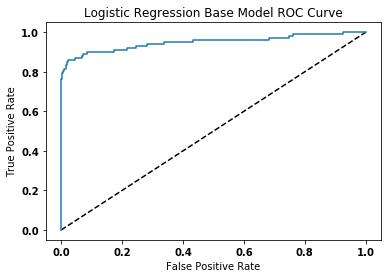

In [106]:
#ROC curve for Logistic Regression Base Model

from sklearn.metrics import roc_curve 
y_lrdown_pred_prob = lr_down.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_lrdown_pred_prob) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression Base Model ROC Curve') 
plt.show(); 

In [107]:
#Area under the curve

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_lrdown_pred_prob)

0.9471535378360686

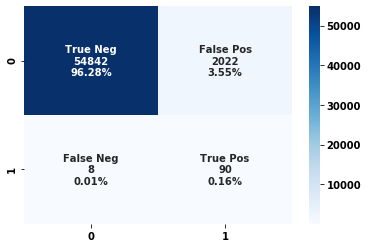

In [97]:
#Base model LR Confusion Matrix
lrdown_cf_matrix_base = confusion_matrix(y_test, lrdown_pred)
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lrdown_cf_matrix_base.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lrdown_cf_matrix_base.flatten()/np.sum(lrdown_cf_matrix_base)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lrdown_cf_matrix_base, annot=labels, fmt='', cmap='Blues')

In [35]:
rf_down.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

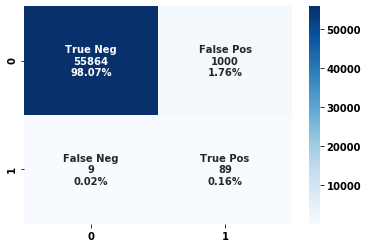

In [98]:
#Base model RF Confusion Matrix
rfdown_cf_matrix_base = confusion_matrix(y_test, rfdown_pred)
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfdown_cf_matrix_base.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rfdown_cf_matrix_base.flatten()/np.sum(rfdown_cf_matrix_base)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfdown_cf_matrix_base, annot=labels, fmt='', cmap='Blues')

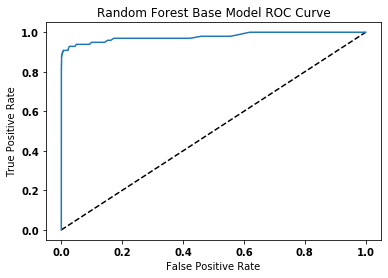

In [102]:
#ROC curve for Random Forest Base Model

from sklearn.metrics import roc_curve 
y_rfdown_pred_prob = rf_down.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_rfdown_pred_prob) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Random Forest Base Model ROC Curve') 
plt.show(); 

In [103]:
#Area under the curve

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_rfdown_pred_prob)

0.9780758673756503

In [36]:
knn_down.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

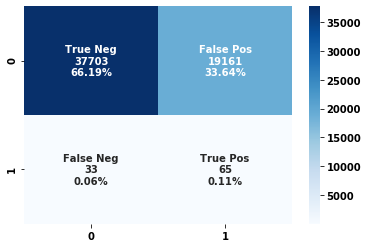

In [99]:
#Base model KNN Confusion Matrix
knndown_cf_matrix_base = confusion_matrix(y_test, knndown_pred)
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                knndown_cf_matrix_base.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     knndown_cf_matrix_base.flatten()/np.sum(knndown_cf_matrix_base)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knndown_cf_matrix_base, annot=labels, fmt='', cmap='Blues')

In [37]:
gb_down.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

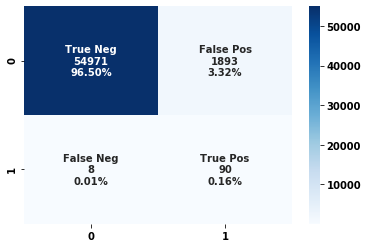

In [100]:
#Base model GB Confusion Matrix
gbdown_cf_matrix_base = confusion_matrix(y_test, gbdown_pred)
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbdown_cf_matrix_base.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     gbdown_cf_matrix_base.flatten()/np.sum(gbdown_cf_matrix_base)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gbdown_cf_matrix_base, annot=labels, fmt='', cmap='Blues')

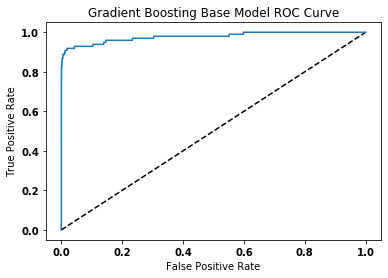

In [104]:
#ROC curve for Gradient Boosting Base Model

from sklearn.metrics import roc_curve 
y_gbdown_pred_prob = gb_down.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_gbdown_pred_prob) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Gradient Boosting Base Model ROC Curve') 
plt.show(); 

In [105]:
#Area under the curve

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_gbdown_pred_prob)

0.9775491003238661

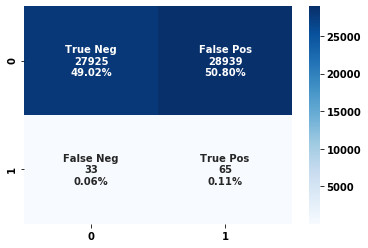

In [101]:
#Base model SVC Confusion Matrix
svcdown_cf_matrix_base = confusion_matrix(y_test, svcdown_pred)
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                svcdown_cf_matrix_base.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     svcdown_cf_matrix_base.flatten()/np.sum(svcdown_cf_matrix_base)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svcdown_cf_matrix_base, annot=labels, fmt='', cmap='Blues')

Tuning LG

In [40]:
#Tuning parameters for the base logistic regression model

from sklearn.model_selection import ParameterGrid

# Create Parameter Space
# Create a list of values of the regularization parameter
C = [0.001, 0.01, 0.1, 1, 10, 100]
# Create a list of options for the regularization penalty
penalty = ['none', 'l2']
# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
lrdown_parameters = dict(C=C,penalty=penalty)

 #Tuning Hyperparameters for LG Models
test_recall_scores_lrdown = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(lrdown_parameters):
    lr_down.set_params(**g) # ** is "unpacking" the dictionary
    lrdown_cv_results_tuned = cross_validate(lr_down.fit(X_train, y_train), X_train, y_train, cv=5, scoring=scoring)
    test_recall_scores_lrdown.append(lrdown_cv_results_tuned['test_rc'].mean())
# find best hyperparameters from the test score and print
best_idx_lrdown = np.argmax(test_recall_scores_lrdown)
print(test_recall_scores_lrdown[best_idx_lrdown])
print(ParameterGrid(lrdown_parameters)[best_idx_lrdown])

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\17138\anaconda3\lib\

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\17138\anaconda3\lib\

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.7003894839337877
{'penalty': 'l2', 'C': 1}


In [41]:
#Tuned logistic regression model
lr_down_tuned = LogisticRegression()
lr_down_tuned.set_params(**ParameterGrid(lrdown_parameters)[best_idx_lrdown])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Fitting the model with tuned parameters and print the recall score
lr_down_tuned.fit(Xd_train,yd_train)
lr_down_tuned_pred = lr_down_tuned.predict(X_test)
print('Tested recall score:',recall_score(y_test,lr_down_tuned_pred))

Tested recall score: 0.9183673469387755


In [43]:
lrdown_cf_matrix = confusion_matrix(y_test, lr_down_tuned_pred)
print(lrdown_cf_matrix)

[[54842  2022]
 [    8    90]]


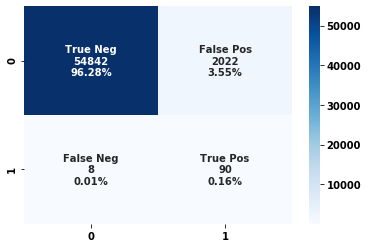

In [44]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lrdown_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lrdown_cf_matrix.flatten()/np.sum(lrdown_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lrdown_cf_matrix, annot=labels, fmt='', cmap='Blues')

In [45]:
Xo = creditcard_df.drop('Class',axis=1)
yo = creditcard_df['Class']
yo.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
lr_down_tuned_predo = lr_down_tuned.predict(Xo)
print('Tested false positive score:',fp(yo,lr_down_tuned_predo))
print('Tested true negative score:',tn(yo,lr_down_tuned_predo))

Tested false positive score: 9955
Tested true negative score: 274360


In [47]:
#Check how the model predicts for the original big dataset
lrdown_cf_matrix_all = confusion_matrix(yo, lr_down_tuned_predo)
print(lrdown_cf_matrix_all)

[[274360   9955]
 [    46    446]]


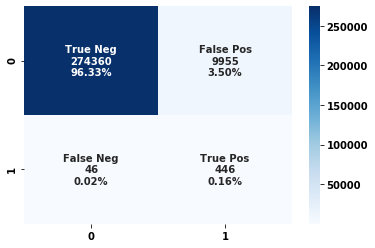

In [48]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lrdown_cf_matrix_all.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lrdown_cf_matrix_all.flatten()/np.sum(lrdown_cf_matrix_all)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lrdown_cf_matrix_all, annot=labels, fmt='', cmap='Blues')

Tuning RF

In [49]:
#Featuring the RF Model
rf_down_featured = RandomForestClassifier()

#Taking the selected featured for the dataset
#Xd_featured_train = downsampled.drop('Class','V19','V8','V13','V5','V28','V26','V1','V15','V22','V25','V23','Time', axis=1)
Xdrf_featured_train = downsampled[['V14','V10','V4','V12','V17','V11','V3','V7','V16','Amount','V2','V18',
                                'V21','V9','V6','V27','V20']]


In [50]:
rf_down_featured.fit(Xd_train,yd_train)
rf_down_featured_pred = rf_down_featured.predict(X_test)
print('Tested recall score:',recall_score(y_test,rf_down_featured_pred))

Tested recall score: 0.9285714285714286


In [51]:
#Tuning Parameters for RF base model
# Create Parameter Space
n_estimators = [30,40,50,75,100, 150, 200, 250]
max_depth = [6,7,8,9,10,12,13,14]
max_features = [3,4,5,6,8,10,12,14,17]
# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
rfdown_parameters = dict(n_estimators = n_estimators,max_depth = max_depth, max_features = max_features)

 #Tuning Hyperparameters for LG Models
test_recall_scores_rfdown = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(rfdown_parameters):
    rf_down_featured.set_params(**g) # ** is "unpacking" the dictionary
    rfdown_cv_results_tuned = cross_validate(rf_down_featured.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, scoring=scoring)
    test_recall_scores_rfdown.append(rfdown_cv_results_tuned['test_rc'].mean())
# find best hyperparameters from the test score and print
best_idx_rfdown = np.argmax(test_recall_scores_rfdown)
print(test_recall_scores_rfdown[best_idx_rfdown])
print(ParameterGrid(rfdown_parameters)[best_idx_rfdown])

0.911165206101915
{'n_estimators': 50, 'max_features': 17, 'max_depth': 9}


In [52]:
#Tuned RF model
rf_down_tuned = RandomForestClassifier()
rf_down_tuned.set_params(**ParameterGrid(rfdown_parameters)[best_idx_rfdown])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=17,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
#Fitting the model with tuned parameters and print the recall score
rf_down_tuned.fit(Xd_train,yd_train)
rf_down_tuned_pred = rf_down_tuned.predict(X_test)
print('Tested RF recall score:',recall_score(y_test,rf_down_tuned_pred))

Tested RF recall score: 0.9183673469387755


In [54]:
#Random Forest Confusion Matrix
rfdown_cf_matrix = confusion_matrix(y_test, rf_down_tuned_pred)
print(rfdown_cf_matrix)

[[55283  1581]
 [    8    90]]


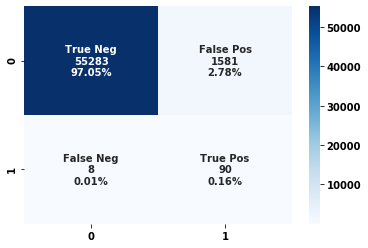

In [55]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfdown_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rfdown_cf_matrix.flatten()/np.sum(rfdown_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfdown_cf_matrix, annot=labels, fmt='', cmap='Blues')

In [56]:
#Check how the model predicts for the original big dataset
rf_down_tuned_predo = rf_down_tuned.predict(Xo)
rfdown_cf_matrix_all = confusion_matrix(yo, rf_down_tuned_predo)
print(rfdown_cf_matrix_all)

[[276640   7675]
 [    15    477]]


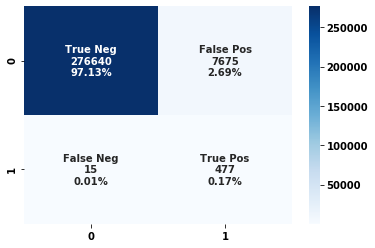

In [57]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfdown_cf_matrix_all.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rfdown_cf_matrix_all.flatten()/np.sum(rfdown_cf_matrix_all)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfdown_cf_matrix_all, annot=labels, fmt='', cmap='Blues')

Tuning GB

In [58]:
#Featuring the GB Model
gb_down_featured = GradientBoostingClassifier(random_state =0)

#Taking the selected featured for the dataset
Xdgb_featured_train = downsampled[['V14','V10','V4','V12','V7','V20','V21','V15','V11','Amount','V3','V17',
                                'V26','V19','V16','V13','V1']]

In [59]:
gb_down_featured.fit(Xd_train,yd_train)
gb_down_featured_pred = gb_down_featured.predict(X_test)
print('Tested GB recall score:',recall_score(y_test,gb_down_featured_pred))

Tested GB recall score: 0.9183673469387755


In [60]:
#Tuning Parameters for GB base model
# Create Parameter Space
n_estimators = [75,100, 150, 200, 250,300,350]
subsample = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
learning_rate = [0.01,0.02, 0.05, 0.07, 0.1,0.2]
max_features = [4,5,6,8,10,12,14,17]
# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
gbdown_parameters = dict(n_estimators = n_estimators, max_features = max_features, 
                         subsample=subsample, learning_rate=learning_rate)

 #Tuning Hyperparameters for GB Models
test_recall_scores_gbdown = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(gbdown_parameters):
    gb_down_featured.set_params(**g) # ** is "unpacking" the dictionary
    gbdown_cv_results_tuned = cross_validate(gb_down_featured.fit(Xd_train, yd_train), Xd_train, yd_train, cv=5, scoring=scoring)
    test_recall_scores_gbdown.append(gbdown_cv_results_tuned['test_rc'].mean())
# find best hyperparameters from the test score and print
best_idx_gbdown = np.argmax(test_recall_scores_gbdown)
print(test_recall_scores_gbdown[best_idx_gbdown])
print(ParameterGrid(gbdown_parameters)[best_idx_gbdown])

0.9289840960727036
{'subsample': 0.5, 'n_estimators': 300, 'max_features': 10, 'learning_rate': 0.1}


In [61]:
#Tuned GB model
gb_down_tuned = GradientBoostingClassifier(random_state =0)
gb_down_tuned.set_params(**ParameterGrid(gbdown_parameters)[best_idx_gbdown])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
#Fitting the model with tuned parameters and print the recall score
gb_down_tuned.fit(Xd_train,yd_train)
gb_down_tuned_pred = gb_down_tuned.predict(X_test)
print('Tested GB recall score:',recall_score(y_test,gb_down_tuned_pred))

Tested GB recall score: 0.9183673469387755


In [63]:
#Gradient Boosting Confusion Matrix
gbdown_cf_matrix = confusion_matrix(y_test, gb_down_tuned_pred)
print(gbdown_cf_matrix)

[[55086  1778]
 [    8    90]]


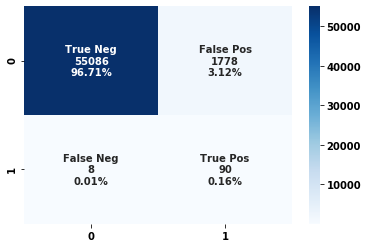

In [64]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbdown_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     gbdown_cf_matrix.flatten()/np.sum(gbdown_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gbdown_cf_matrix, annot=labels, fmt='', cmap='Blues')

In [65]:
#Check how the model predicts for the original big dataset
gb_down_tuned_predo = gb_down_tuned.predict(Xo)
gbdown_cf_matrix_all = confusion_matrix(yo, gb_down_tuned_predo)
print(gbdown_cf_matrix_all)

[[275753   8562]
 [     8    484]]


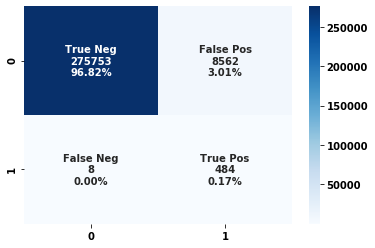

In [66]:
#heatmap Confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbdown_cf_matrix_all.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     gbdown_cf_matrix_all.flatten()/np.sum(gbdown_cf_matrix_all)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gbdown_cf_matrix_all, annot=labels, fmt='', cmap='Blues')